In [50]:
import pandas as pd

df =pd.read_excel('/Users/ececal/Notebook/video-list-first-draft_categorized_metadata.xlsx', index_col=0) 

df

,nrComments,nrThreads,nrReplies,maxThreadLength,disabled,nrAuthors,nrAuthors3Posts,maxPostsByAuthor,url,Relevance,Content,kind,etag,viewCount,likeCount,favoriteCount,commentCount
id,,,,,,,,,,,,,,,,,
N7Qot_aax9M,32,5,13,8,False,19,3,6,https://www.youtube.com/watch?v=N7Qot_aax9M,Y,Politician,youtube#video,2mIEADGTWUY_AhLeY92AZTfElbc,2363,34,0,82
_evqapQpxUQ,108,5,8,2,False,49,4,18,https://www.youtube.com/watch?v=_evqapQpxUQ,Y,News,youtube#video,vWtEvV3CoxKfal0P3jWksH9rvFk,367516,7774,0,1918
dcBXmj1nMTQ,120,13,20,7,False,98,4,7,https://www.youtube.com/watch?v=dcBXmj1nMTQ,Y,Inform,youtube#video,tfdmp7f-PBSwL_hqScqPtBEoBgw,1064747,24133,0,2117
LxgMdjyw8uw,168,29,68,382,False,107,10,21,https://www.youtube.com/watch?v=LxgMdjyw8uw,Y,Inform,youtube#video,6IJaw1CgYc68g8QeKca7L0eJdUQ,9739864,588197,0,42800
9PFhrpyWV-w,110,8,26,9,False,99,1,3,https://www.youtube.com/watch?v=9PFhrpyWV-w,Y,Inform,youtube#video,tlOMLLOrGrQgSCixrr9sKR0IEH0,89237,2643,0,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hhI4IBC66sw,70,14,27,6,False,56,3,5,https://www.youtube.com/watch?v=hhI4IBC66sw,Y,Debate/Controversy,youtube#video,-NjCjFTV9amjAFgqvIZNrQ9e_Fc,7311,634,0,65
2CAG6Fg6Vlo,146,22,46,8,False,102,6,19,https://www.youtube.com/watch?v=2CAG6Fg6Vlo,Y,Interview,youtube#video,ef4uivgl_nOnu_jFRNLWjC83TZo,4289,78,0,256
afxhSL15KtQ,171,35,71,17,False,109,10,11,https://www.youtube.com/watch?v=afxhSL15KtQ,Y,News,youtube#video,gJh5Bl900qruXQv5C4R0AmGbpy4,41106,380,0,323


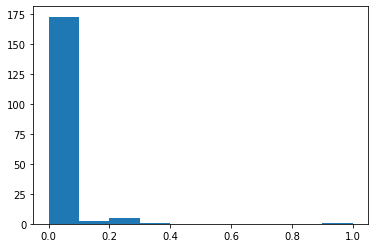

In [51]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
#plt.hist(df.favoriteCount)
#plt.show() 
view_counts = scaler.fit_transform(df.viewCount.values.reshape(-1,1))
like_counts = scaler.fit_transform(df.likeCount.values.reshape(-1,1))
comment_counts=scaler.fit_transform(df.commentCount.values.reshape(-1,1))
engagement_scores=(view_counts+like_counts+comment_counts)/3
df['popularityScore']=engagement_scores
plt.hist(engagement_scores)
plt.show() 

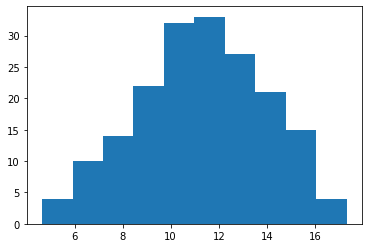

In [52]:
import matplotlib.pyplot as plt
import math
import numpy as np
df['popularityScore2']=np.log(df.viewCount + df.likeCount +df.commentCount)
plt.hist(np.log(df.viewCount + df.likeCount +df.commentCount))
plt.show() 

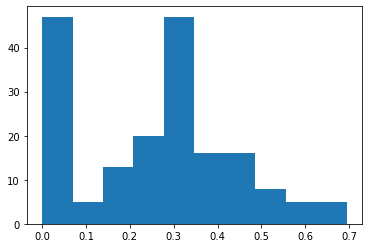

In [53]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
#plt.hist(df.favoriteCount)
#plt.show() 
thread_counts = scaler.fit_transform(df.nrThreads.values.reshape(-1,1))
thread_lenghts = scaler.fit_transform(df.maxThreadLength.values.reshape(-1,1))
comment_counts=scaler.fit_transform(df.nrComments.values.reshape(-1,1))
author_counts=scaler.fit_transform(df.nrAuthors.values.reshape(-1,1))
debate_score2=np.mean([thread_counts,thread_lenghts,comment_counts,author_counts], axis=0)
df['debateScore']=debate_scores
plt.hist(debate_scores)
plt.show() 

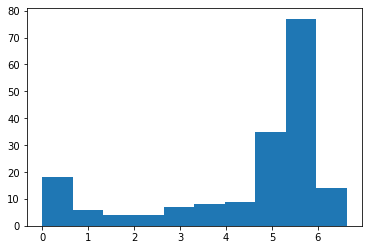

In [54]:
import matplotlib.pyplot as plt
import math
import numpy as np
df['debateScore2']=np.log(df.nrThreads + df.nrComments +df.maxThreadLength + df.nrAuthors+1)
plt.hist(df['debateScore2'].values)
plt.show() 

In [57]:
df1= df.sort_values('viewCount', ascending=False)
df2= df.sort_values('likeCount', ascending=False)
df3= df.sort_values('commentCount', ascending=False)
df4= df.sort_values('popularityScore', ascending=False)
df5= df.sort_values('popularityScore2', ascending=False)
df6= df.sort_values('debateScore', ascending=False)
df7= df.sort_values('debateScore2', ascending=False)

with pd.ExcelWriter('video-list-ranked.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='viewCount')
    df2.to_excel(writer, sheet_name='likeCount')
    df3.to_excel(writer, sheet_name='commentCount')
    df4.to_excel(writer, sheet_name='popularityScore')
    df5.to_excel(writer, sheet_name='popularityScore2')
    df6.to_excel(writer, sheet_name='debateScore')
    df7.to_excel(writer, sheet_name='debateScore2')    